# **Proyek Analisis Data : Air Quality Dataset**
* Nama          : Firman Nurcahyo
* Email         : firman.cahyo.369@gmail.com
* ID Dicoding   : Firman Nurcahyo

# **Menentukan Pertanyaan Bisnis**
1. Area yang menunjukkan kualitas udara terbaik dan terburuk dalam rentang waktu 2013 hingga 2017?
2. Apa pengaruh dari variabel TEMP, WSPM, PRES, dan DEWP terhadap kualitas udara?
3. Bagaimana kualitas udara bervariasi berdasarkan tahun, bulan, hari, dan jam?

# **Mengimport Modul Yang Diperlukan**

In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from datetime import datetime

# **Data Wrangling**

## **Gathering Data**

### **1. Menyiapkan Dataset**

In [203]:
data_files = [
    "Aotizhongxin", "Changping", "Dingling", "Dongsi", "Guanyuan",
    "Gucheng", "Huairou", "Nongzhanguan", "Shunyi", "Tiantan",
    "Wanliu", "Wanshouxigong"
] # Firman Nurcahyo_DICODING_IDCAMP

dfs = []

for file in data_files:
    filename = f"data/PRSA_Data_{file}_20130301-20170228.csv"
    df = pd.read_csv(filename)
    dfs.append(df)

df1 = pd.read_csv("data/PRSA_Data_Aotizhongxin_20130301-20170228.csv")
df2 = pd.read_csv("data/PRSA_Data_Changping_20130301-20170228.csv")
df3 = pd.read_csv("data/PRSA_Data_Dingling_20130301-20170228.csv")
df4 = pd.read_csv("data/PRSA_Data_Dongsi_20130301-20170228.csv")
df5 = pd.read_csv("data/PRSA_Data_Guanyuan_20130301-20170228.csv")
df6 = pd.read_csv("data/PRSA_Data_Gucheng_20130301-20170228.csv")
df7 = pd.read_csv("data/PRSA_Data_Huairou_20130301-20170228.csv")
df8 = pd.read_csv("data/PRSA_Data_Nongzhanguan_20130301-20170228.csv")
df9 = pd.read_csv("data/PRSA_Data_Shunyi_20130301-20170228.csv")
df10 = pd.read_csv("data/PRSA_Data_Tiantan_20130301-20170228.csv")
df11 = pd.read_csv("data/PRSA_Data_Wanliu_20130301-20170228.csv")
df12 = pd.read_csv("data/PRSA_Data_Wanshouxigong_20130301-20170228.csv")

In [204]:
df_AQI = pd.concat(dfs, axis=0)
df_AQI = df_AQI.reset_index() 
df_AQI

,index,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,35059,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
420764,35060,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
420765,35061,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
420766,35062,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


### **2. Menghapus Kolom Yang Tidak Diperlukan**

In [205]:
# Drop the 'No' column and display the first 5 rows
df_AQI = df_AQI.drop('No', axis=1)
df_AQI.head()

,index,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


### **3. Menambahkan Kolom Baru Datetime (Gabungan Dari Kolom Year, Month, Day)**

In [206]:
# Combine 'year', 'month', and 'day' columns into a new 'datetime' column
df_AQI['datetime'] = pd.to_datetime(df_AQI[['year', 'month', 'day', 'hour']])
# Move the 'datetime' column to the leftmost position
df_AQI = df_AQI[['datetime'] + [col for col in df_AQI.columns if col != 'datetime']] 
df_AQI.head()
# Firman Nurcahyo_DICODING_IDCAMP

,datetime,index,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2013-03-01 01:00:00,1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,2013-03-01 02:00:00,2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,2013-03-01 03:00:00,3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,2013-03-01 04:00:00,4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [207]:
# Replacing the data contents of the 'month' column
month_mapping = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 
                 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
df_AQI['month'] = df_AQI['month'].map(month_mapping)

In [208]:
# Change the data contents of the 'hour' column
df_AQI['hour'] = df_AQI['hour'].apply(lambda hour_number: f'{hour_number:02}:00')

In [209]:
# Replacing the data contents of the 'day' column
df_AQI['day'] = (df_AQI['day'] - 1) % 7  # Adjusting day number to fit the calendar
df_AQI['day'] = df_AQI['day'].apply(lambda number: calendar.day_name[number])

In [210]:
# Adding the name of each column with "column_"
df_AQI = df_AQI.add_prefix('column_')
# Firman Nurcahyo_DICODING_IDCAMP

In [211]:
# Changing a specific column to the "category" data type
columns_to_convert = ["year", "month", "day", "hour"]
# Adjust the column names based on the actual column names in your DataFrame
actual_columns_to_convert = [f'column_{col}' for col in columns_to_convert]
df_AQI[actual_columns_to_convert] = df_AQI[actual_columns_to_convert].astype("category")

## **Assesing Data**

### **1. Memeriksa Tipe Data DF_AQI**

In [212]:
print('type data df_Nongzhanguan\n')
df_AQI.info() # Firman Nurcahyo_DICODING_IDCAMP

type data df_Nongzhanguan

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   column_datetime  420768 non-null  datetime64[ns]
 1   column_index     420768 non-null  int64         
 2   column_year      420768 non-null  category      
 3   column_month     420768 non-null  category      
 4   column_day       420768 non-null  category      
 5   column_hour      420768 non-null  category      
 6   column_PM2.5     412029 non-null  float64       
 7   column_PM10      414319 non-null  float64       
 8   column_SO2       411747 non-null  float64       
 9   column_NO2       408652 non-null  float64       
 10  column_CO        400067 non-null  float64       
 11  column_O3        407491 non-null  float64       
 12  column_TEMP      420370 non-null  float64       
 13  column_PRES      420375 non-null  float64      

### **2. Memeriksa Missing Value**

In [213]:
print('=' * 49)
print('| Jumlah data missing value df_AQI_Nongzhanguan |')
print('=' * 49)
df_AQI.isna().sum() # Firman Nurcahyo_DICODING_IDCAMP

| Jumlah data missing value df_AQI_Nongzhanguan |


column_datetime        0
column_index           0
column_year            0
column_month           0
column_day             0
column_hour            0
column_PM2.5        8739
column_PM10         6449
column_SO2          9021
column_NO2         12116
column_CO          20701
column_O3          13277
column_TEMP          398
column_PRES          393
column_DEWP          403
column_RAIN          390
column_wd           1822
column_WSPM          318
column_station         0
dtype: int64

### **3. Pemeriksaan Data Duplicated DF_Nongzhanguan**

In [214]:
print(f'Jumlah data duplicated df_AQI_Nongzhanguan: {df_AQI.duplicated().sum()}') # Firman Nurcahyo_DICODING_IDCAMP

Jumlah data duplicated df_AQI_Nongzhanguan: 0


### **4. Memeriksa Parameter Statistik DF_Nongzhanguan**

In [215]:
df_AQI.describe()


,column_datetime,column_index,column_PM2.5,column_PM10,column_SO2,column_NO2,column_CO,column_O3,column_TEMP,column_PRES,column_DEWP,column_RAIN,column_WSPM
count,420768,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,2015-03-01 11:30:00.000001024,17531.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
min,2013-03-01 00:00:00,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,2014-03-01 05:45:00,8765.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,2015-03-01 11:30:00,17531.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,2016-02-29 17:15:00,26297.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,2017-02-28 23:00:00,35063.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000
std,NaN,10122.116943,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386


## **Cleaning Data**

### **1. Menangani Missing Values**

In [216]:
df_AQI.isna().sum()

column_datetime        0
column_index           0
column_year            0
column_month           0
column_day             0
column_hour            0
column_PM2.5        8739
column_PM10         6449
column_SO2          9021
column_NO2         12116
column_CO          20701
column_O3          13277
column_TEMP          398
column_PRES          393
column_DEWP          403
column_RAIN          390
column_wd           1822
column_WSPM          318
column_station         0
dtype: int64

Dalam output kode tersebut, terdapat nilai yang hilang pada setiap kolom, dan penanganannya bervariasi. Untuk nilai yang hilang kurang dari 5000, akan dihapus. Untuk nilai antara 5000-10000, akan digantikan dengan rata-rata atau modus. Sedangkan, untuk nilai yang hilang di atas 10000, akan diganti dengan median agar tidak terpengaruh oleh pencilan (outlier).

* **Missing Value Under 5000**

In [217]:
# Delete columns that have empty values
df_AQI.dropna(subset=["column_WSPM", "column_wd", "column_RAIN", "column_DEWP", "column_PRES", "column_TEMP"], inplace=True)

* **Missing Value Between 5000 - 10000**

In [218]:
# Replace empty column values ​with mean values
name_kolom = ["column_PM2.5", "column_PM10", "column_SO2", "column_NO2", "column_O3"]

for kolom in name_kolom: # Firman Nurcahyo_DICODING_IDCAMP
    mean_kolom = df_AQI[kolom].mean()
    df_AQI[kolom].fillna(mean_kolom, inplace=True)

* **Missing Value Above 10000**

In [219]:
# Replace empty column values ​​with median values
median_value = df_AQI["column_CO"].median()
df_AQI["column_CO"].fillna(median_value, inplace=True)


### **2. Memeriksa Missing Value**

In [220]:
df_AQI.isna().sum()

column_datetime    0
column_index       0
column_year        0
column_month       0
column_day         0
column_hour        0
column_PM2.5       0
column_PM10        0
column_SO2         0
column_NO2         0
column_CO          0
column_O3          0
column_TEMP        0
column_PRES        0
column_DEWP        0
column_RAIN        0
column_wd          0
column_WSPM        0
column_station     0
dtype: int64

Dari hasil output di atas, terlihat bahwa data kita telah berhasil dibersihkan dari nilai yang hilang (missing value).

# **Exploratory Data Analysis (EDA)**

In [221]:
# Displays statistical parameters of data from all columns
df_AQI.describe(include='all')

,column_datetime,column_index,column_year,column_month,column_day,column_hour,column_PM2.5,column_PM10,column_SO2,column_NO2,column_CO,column_O3,column_TEMP,column_PRES,column_DEWP,column_RAIN,column_wd,column_WSPM,column_station
count,418858,418858.000000,418858.0,418858,418858,418858,418858.000000,418858.000000,418858.00000,418858.000000,418858.000000,418858.000000,418858.000000,418858.000000,418858.000000,418858.000000,418858,418858.000000,418858
unique,NaN,NaN,5.0,12,7,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,12
top,NaN,NaN,2014.0,Mar,Monday,16:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Dongsi
freq,NaN,NaN,105105.0,35692,67975,17519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43322,NaN,34980
mean,2015-02-27 12:05:34.638468864,17484.092955,NaN,NaN,NaN,NaN,79.707228,104.540046,15.84451,50.594782,1212.680302,57.507136,13.562796,1010.732098,2.493081,0.064609,NaN,1.734993,NaN
min,2013-03-01 00:00:00,0.000000,NaN,NaN,NaN,NaN,2.000000,2.000000,0.28560,1.026500,100.000000,0.214200,-19.900000,982.400000,-36.000000,0.000000,NaN,0.000000,NaN
25%,2014-02-27 17:00:00,8729.000000,NaN,NaN,NaN,NaN,21.000000,36.000000,3.00000,24.000000,500.000000,12.000000,3.200000,1002.200000,-8.900000,0.000000,NaN,0.900000,NaN
50%,2015-02-27 01:00:00,17473.000000,NaN,NaN,NaN,NaN,57.000000,84.000000,8.00000,45.000000,900.000000,47.000000,14.500000,1010.400000,3.100000,0.000000,NaN,1.400000,NaN
75%,2016-02-27 03:00:00,26235.000000,NaN,NaN,NaN,NaN,109.000000,144.000000,19.00000,70.000000,1500.000000,80.000000,23.300000,1019.000000,15.100000,0.000000,NaN,2.200000,NaN
max,2017-02-28 23:00:00,35063.000000,NaN,NaN,NaN,NaN,999.000000,999.000000,500.00000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,NaN,13.200000,NaN


In [222]:
# limits/standards for each factor to determine air quality
def determine_air_quality(pm25, pm10, so2, no2, co, o3):
    standards = {
        'PM2.5': [(0, 12), (12, 35), (35, float('inf'))],
        'PM10': [(0, 50), (50, 100), (100, float('inf'))],
        'SO2': [(0, 20), (20, 100), (100, float('inf'))],
        'NO2': [(0, 40), (40, 100), (100, float('inf'))],
        'CO': [(0, 1000), (1000, 5000), (5000, float('inf'))],
        'O3': [(0, 100), (100, 180), (180, float('inf'))]
    }

    # Function to determine air quality
    def determine_quality(value, parameter):
        for quality, bounds in enumerate(standards[parameter], start=1):
            if isinstance(bounds, tuple):
                if bounds[0] <= value < bounds[1]:
                    return quality # Firman Nurcahyo_DICODING_IDCAMP
            else:
                if value == bounds:
                    return quality
        return 3  # If no match is found, consider the quality as "Bad"

    quality_pm25 = determine_quality(float(pm25), 'PM2.5')
    quality_pm10 = determine_quality(float(pm10), 'PM10')
    quality_so2 = determine_quality(float(so2), 'SO2')
    quality_no2 = determine_quality(float(no2), 'NO2')
    quality_co = determine_quality(float(co), 'CO')
    quality_o3 = determine_quality(float(o3), 'O3')

    average_quality = (quality_pm25 + quality_pm10 + quality_so2 + quality_no2 + quality_co + quality_o3) / 6

    if average_quality < 2:
        return 'Good'
    elif 2 <= average_quality < 2.5:
        return 'Moderate'
    else:
        return 'Bad' # Firman Nurcahyo_DICODING_IDCAMP


# Applying the function to create a new column
df_AQI['air_quality'] = df_AQI.apply(
    lambda row: determine_air_quality(
        row['column_PM2.5'],
        row['column_PM10'],
        row['column_SO2'],
        row['column_NO2'],
        row['column_CO'],
        row['column_O3']
    ),
    axis=1
)
df_AQI['air_quality'] = df_AQI['air_quality'].astype('category')


In [223]:
# Run the code below to check whether the process has run well or not.
df_AQI.sample(20)

,column_datetime,column_index,column_year,column_month,column_day,column_hour,column_PM2.5,column_PM10,column_SO2,column_NO2,column_CO,column_O3,column_TEMP,column_PRES,column_DEWP,column_RAIN,column_wd,column_WSPM,column_station,air_quality
250244,2013-09-16 20:00:00,4796,2013,Sep,Tuesday,20:00,52.0,92.0,25.0,91.0,1600.0,22.0,21.4,1007.2,17.4,0.0,E,1.0,Nongzhanguan,Moderate
184676,2014-03-25 20:00:00,9356,2014,Mar,Thursday,20:00,217.0,289.0,39.0,143.0,1400.0,57.0,15.8,1001.5,5.7,0.0,SW,0.0,Gucheng,Moderate
332641,2015-02-10 01:00:00,17065,2015,Feb,Wednesday,01:00,189.0,189.0,33.0,100.0,2700.0,6.0,-4.0,1016.0,-15.9,0.0,NE,0.7,Tiantan,Moderate
282307,2013-05-14 19:00:00,1795,2013,May,Sunday,19:00,30.0,94.0,3.0,22.0,300.0,127.0,22.7,1005.6,5.6,0.0,WSW,0.9,Shunyi,Good
73675,2013-07-26 19:00:00,3547,2013,Jul,Friday,19:00,57.0,50.0,3.0,40.0,1300.0,13.0,25.2,993.9,22.1,0.0,NNW,0.7,Dingling,Good
26941,2016-03-27 13:00:00,26941,2016,Mar,Saturday,13:00,4.0,14.0,8.0,7.0,300.0,101.0,20.5,1013.9,-12.2,0.0,N,2.2,Aotizhongxin,Good
9315,2014-03-24 03:00:00,9315,2014,Mar,Wednesday,03:00,234.0,246.0,44.0,129.0,2400.0,2.0,8.3,1010.8,3.1,0.0,NE,1.4,Aotizhongxin,Moderate
242811,2016-11-11 03:00:00,32427,2016,Nov,Thursday,03:00,83.0,84.0,2.0,39.0,1600.0,2.0,-1.4,1005.3,-2.5,0.0,NNW,1.3,Huairou,Good
232617,2015-09-13 09:00:00,22233,2015,Sep,Saturday,09:00,12.0,45.0,2.0,25.0,400.0,4.0,20.3,1008.6,12.0,0.0,ESE,1.5,Huairou,Good
383559,2016-12-01 15:00:00,32919,2016,Dec,Monday,15:00,8.0,19.0,3.0,23.0,400.0,66.0,11.1,1026.9,-13.1,0.0,SSW,1.7,Wanliu,Good


In [224]:
# Review the output in the air_quality column, ensuring that the results are as desired. 
# Next, check the amount of data in the air_quality column.
df_AQI.air_quality.value_counts()

air_quality
Good        263145
Moderate    147974
Bad           7739
Name: count, dtype: int64

In [225]:
df_AQI["index_AQI"] = df_AQI["air_quality"]
df_AQI["index_AQI"] = df_AQI["index_AQI"].map({"Good": 1, "Moderate": 0, "Bad": -1})
df_AQI["index_AQI"] = df_AQI["index_AQI"].astype("int") # Firman Nurcahyo_DICODING_IDCAMP

In [226]:
df_AQI.info() # Displays the amount of data and data type

<class 'pandas.core.frame.DataFrame'>
Index: 418858 entries, 0 to 420767
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   column_datetime  418858 non-null  datetime64[ns]
 1   column_index     418858 non-null  int64         
 2   column_year      418858 non-null  category      
 3   column_month     418858 non-null  category      
 4   column_day       418858 non-null  category      
 5   column_hour      418858 non-null  category      
 6   column_PM2.5     418858 non-null  float64       
 7   column_PM10      418858 non-null  float64       
 8   column_SO2       418858 non-null  float64       
 9   column_NO2       418858 non-null  float64       
 10  column_CO        418858 non-null  float64       
 11  column_O3        418858 non-null  float64       
 12  column_TEMP      418858 non-null  float64       
 13  column_PRES      418858 non-null  float64       
 14  column_DEWP      418858 n

### **1. Cek Data Parameter**

#### **1.1 Cek Data Parameter Statistik PM2.5, PM10, SO2, NO2, CO, O3 Berdasarkan Air Quality**

In [227]:
df_AQI.groupby(by= "air_quality").agg({
    "column_PM2.5": ["max", "min", "mean"],
    "column_PM10" : ['max', 'min', 'mean'],
    "column_SO2" : ['max', 'min', 'mean'],
    "column_NO2" : ['max', 'min', 'mean'],
    "column_CO" : ['max', 'min', 'mean'],
    "column_O3" : ['max', 'min', 'mean'],
    # Firman Nurcahyo_DICODING_IDCAMP
})

column_PM2.5                   column_PM10                    \
                     max   min        mean         max   min        mean   
air_quality                                                                
Bad                809.0  42.0  272.905984       999.0  61.0  311.903373   
Good               580.0   2.0   38.803316       999.0   2.0   58.783212   
Moderate           999.0   3.0  142.343196       994.0   4.0  175.065256   

            column_SO2                    column_NO2                       \
                   max     min       mean        max      min        mean   
air_quality                                                                 
Bad              315.0  4.0000  79.109075      273.0  40.0000  121.619599   
Good             500.0  0.2856   7.302790      231.0   1.0265   34.229837   
Moderate         500.0  0.2856  27.725695      290.0   2.0000   75.982298   

            column_CO                     column_O3                     
                  max    min         mean       max     min       mean  
air_quality                                                             
Bad           10000.0  400.0  4580.754490    1071.0  0.2142  55.420245  
Good          10000.0  100.0   681.662034    1050.0  0.2142  60.845998  
Moderate      10000.0  100.0  1980.850899    1071.0  0.2142  51.678719

Hasil analisis menunjukkan bahwa baris dengan nilai 'Good' pada kolom air_quality memiliki rata-rata yang relatif lebih rendah dibandingkan dengan baris berkategori lainnya. Jika kita mengelompokkan berdasarkan nilai mean dari yang terkecil ke terbesar, urutan kategorinya adalah sebagai berikut:

1. Kategori 'Good'
2. Kategori 'Moderate'
3. Kategori 'Bad'

#### **1.2 Cek Data Parameter Statistik PM2.5, PM10, SO2, NO2, CO, O3 Berdasarkan Tempat Stasiun**

In [228]:
df_AQI.groupby(by= "column_station").agg({
    # Firman Nurcahyo_DICODING_IDCAMP
    "column_PM2.5": ["max", "min", "mean"],
    "column_PM10" : ['max', 'min', 'mean'],
    "column_SO2" : ['max', 'min', 'mean'],
    "column_NO2" : ['max', 'min', 'mean'],
    "column_CO" : ['max', 'min', 'mean'],
    "column_O3" : ['max', 'min', 'mean'],
})

column_PM2.5                 column_PM10                   \
                        max  min       mean         max  min        mean   
column_station                                                             
Aotizhongxin          898.0  3.0  82.675086       984.0  2.0  109.946421   
Changping             882.0  2.0  71.179889       999.0  2.0   94.720732   
Dingling              881.0  3.0  66.188317       905.0  2.0   84.055196   
Dongsi                737.0  3.0  86.017997       955.0  2.0  110.196997   
Guanyuan              680.0  2.0  82.854068       999.0  2.0  108.935650   
Gucheng               770.0  2.0  83.686124       994.0  2.0  118.646175   
Huairou               762.0  2.0  69.762001       993.0  2.0   91.722954   
Nongzhanguan          844.0  2.0  84.720816       995.0  2.0  108.911015   
Shunyi                941.0  2.0  78.980924       999.0  2.0   98.302053   
Tiantan               821.0  3.0  82.103133       988.0  2.0  106.333994   
Wanliu                957.0  2.0  83.330616       951.0  2.0  110.424038   
Wanshouxigong         999.0  3.0  84.887476       961.0  2.0  112.113412   

               column_SO2                    column_NO2                     \
                      max     min       mean        max     min       mean   
column_station                                                               
Aotizhongxin        341.0  0.2856  17.345220      290.0  2.0000  59.010902   
Changping           310.0  0.2856  14.982183      226.0  1.8477  44.267785   
Dingling            156.0  0.2856  11.830243      205.0  1.0265  28.366600   
Dongsi              300.0  0.2856  18.487665      258.0  2.0000  53.508997   
Guanyuan            293.0  1.0000  17.566285      270.0  2.0000  57.725304   
Gucheng             500.0  0.2856  15.372565      276.0  2.0000  55.723211   
Huairou             315.0  0.2856  12.268448      231.0  1.0265  33.349722   
Nongzhanguan        257.0  0.5712  18.659744      273.0  2.0000  57.923299   
Shunyi              239.0  0.2856  13.636948      258.0  2.0000  43.773834   
Tiantan             273.0  0.5712  14.430910      241.0  2.0000  53.096813   
Wanliu              282.0  0.2856  18.364478      264.0  1.6424  64.786588   
Wanshouxigong       411.0  0.2856  17.133690      251.0  2.0000  55.390408   

               column_CO                      column_O3                     
                     max    min         mean        max     min       mean  
column_station                                                              
Aotizhongxin     10000.0  100.0  1243.760700   423.0000  0.2142  56.459472  
Changping        10000.0  100.0  1138.952367   429.0000  0.2142  58.055606  
Dingling         10000.0  100.0   902.512674   500.0000  0.2142  68.282120  
Dongsi           10000.0  100.0  1289.980360  1071.0000  0.6426  57.295073  
Guanyuan         10000.0  100.0  1252.153901   415.0000  0.2142  55.895995  
Gucheng          10000.0  100.0  1305.603502   450.0000  0.2142  57.816993  
Huairou          10000.0  100.0  1015.422110   444.0000  0.2142  60.018291  
Nongzhanguan     10000.0  100.0  1308.966524   390.0000  0.2142  58.591829  
Shunyi           10000.0  100.0  1159.490021   351.7164  0.2142  55.748211  
Tiantan          10000.0  100.0  1284.823270   674.0000  0.4284  56.095801  
Wanliu           10000.0  100.0  1295.930814   364.0000  0.2142  49.493694  
Wanshouxigong     9800.0  100.0  1352.272192   358.0000  0.2142  56.340105

Dari hasil analisis, dapat disimpulkan bahwa Daerah Dingling, Huairou, dan Changping memiliki nilai rata-rata yang paling rendah untuk parameter-parameter yang diamati. Sebaliknya, Daerah Nongzhanguan, Gucheng, dan Wanliu menunjukkan nilai rata-rata tertinggi di antara daerah-daerah lainnya.

#### **1.3 Cek Data Parameter Statistik PM2.5, PM10, SO2, NO2, CO, O3 Berdasarkan Tahun**

In [229]:
df_AQI.groupby(by= "column_year").agg({
    # Firman Nurcahyo_DICODING_IDCAMP
    "column_PM2.5": ["max", "min", "mean", "count"],
    "column_PM10" : ['max', 'min', 'mean', "count"],
    "column_SO2" : ['max', 'min', 'mean', "count"],
    "column_NO2" : ['max', 'min', 'mean', "count"],
    "column_CO" : ['max', 'min', 'mean', "count"],
    "column_O3" : ['max', 'min', 'mean', "count"],
})

column_PM2.5                         column_PM10                   \
                     max  min       mean   count         max  min        mean   
column_year                                                                     
2013               844.0  2.0  80.010274   88094       999.0  2.0  102.823659   
2014               809.0  3.0  85.419711  105105       999.0  3.0  115.870830   
2015               762.0  3.0  79.540518  104523       999.0  3.0  103.556222   
2016               999.0  3.0  71.916931  104631       995.0  3.0   94.605875   
2017               835.0  2.0  92.153426   16505       994.0  3.0  110.752470   

                    column_SO2          ... column_NO2         column_CO  \
              count        max     min  ...       mean   count       max   
column_year                             ...                                
2013          88094      234.0  0.2856  ...  52.480708   88094   10000.0   
2014         105105      500.0  1.0000  ...  54.576215  105105   10000.0   
2015         104523      314.0  2.0000  ...  48.211039  104523   10000.0   
2016         104631      500.0  2.0000  ...  46.388064  104631   10000.0   
2017          16505      300.0  1.0000  ...  56.938423   16505   10000.0   

                                        column_O3                             
               min         mean   count       max     min       mean   count  
column_year                                                                   
2013         100.0  1158.579994   88094    1071.0  0.2142  57.348644   88094  
2014         100.0  1245.365111  105105     413.0  1.0000  58.274299  105105  
2015         100.0  1250.818480  104523     450.0  2.0000  59.369281  104523  
2016         100.0  1130.672554  104631     500.0  1.0000  57.696044  104631  
2017         100.0  1571.651015   16505     500.0  1.0000  40.477576   16505  

[5 rows x 24 columns]

Rata-rata konsentrasi PM2.5 (Partikel Matter 2.5 Mikrometer) mencapai level terendah pada tahun 2016, sementara mencapai level tertinggi pada tahun 2017. Sebaliknya, untuk PM10 (Partikel Matter 10 Mikrometer), rata-rata terendah terjadi pada tahun 2016 dan tertinggi pada tahun 2014.

Di sisi lain, konsentrasi rata-rata SO2 (Dioksida Belerang) paling rendah pada tahun 2016 dan paling tinggi pada tahun 2014. Untuk NO2 (Dioksida Nitrogen), rata-rata terendah terjadi pada tahun 2016, sementara tertinggi pada tahun 2014.

Kemudian, Karbon Monoksida (CO) menunjukkan rata-rata paling rendah pada tahun 2016 dan paling tinggi pada tahun 2017. Terakhir, konsentrasi rata-rata O3 (Ozon) mencapai level terendah pada tahun 2017, sementara mencapai level tertinggi pada tahun 2015.

#### **1.4 Cek Data Parameter Statistik PM2.5, PM10, SO2, NO2, CO, O3 Berdasarkan Bulan**

In [230]:
df_AQI.groupby(by= "column_month").agg({
    "column_PM2.5": ["max", "min", "mean", "count"],
    "column_PM10" : ['max', 'min', 'mean', "count"],
    "column_SO2" : ['max', 'min', 'mean', "count"],
    "column_NO2" : ['max', 'min', 'mean', "count"],
    # Firman Nurcahyo_DICODING_IDCAMP
    "column_CO" : ['max', 'min', 'mean', "count"],
    "column_O3" : ['max', 'min', 'mean', "count"],
})

column_PM2.5                         column_PM10       \
                      max  min        mean  count         max  min   
column_month                                                         
Apr                 533.0  2.0   72.889229  34510       999.0  2.0   
Aug                 500.0  3.0   53.854657  35642       748.0  2.0   
Dec                 741.0  3.0  103.656280  35580       948.0  2.0   
Feb                 999.0  3.0   87.302109  32274       992.0  3.0   
Jan                 835.0  2.0   93.440503  35244       999.0  3.0   
Jul                 540.0  3.0   71.989508  35647       862.0  2.0   
Jun                 560.0  2.0   69.346075  34531       647.0  2.0   
Mar                 558.0  3.0   94.473345  35692       987.0  2.0   
May                 844.0  3.0   63.583799  35665       995.0  2.0   
Nov                 687.0  3.0   92.996062  34358       993.0  3.0   
Oct                 527.0  3.0   91.386328  35468       999.0  2.0   
Sep                 477.0  3.0   61.766353  34247       584.0  2.0   

                                column_SO2          ... column_NO2         \
                    mean  count        max     min  ...       mean  count   
column_month                                        ...                     
Apr           116.719498  34510      158.0  0.2856  ...  47.394787  34510   
Aug            71.834993  35642      218.0  0.2856  ...  36.393633  35642   
Dec           124.731482  35580      219.0  1.0000  ...  66.078639  35580   
Feb           102.547699  32274      500.0  1.0000  ...  50.220793  32274   
Jan           113.125964  35244      500.0  1.0000  ...  61.480173  35244   
Jul            84.987446  35647      240.0  0.2856  ...  36.193508  35647   
Jun            86.989335  34531      227.0  0.2856  ...  39.602553  34531   
Mar           135.699181  35692      310.0  1.4280  ...  59.937678  35692   
May           107.021183  35665      500.0  2.0000  ...  42.850657  35665   
Nov           117.804457  34358      234.0  0.5712  ...  61.688627  34358   
Oct           112.339021  35468      273.0  0.2856  ...  59.484168  35468   
Sep            79.974660  34247      147.0  1.0000  ...  45.727506  34247   

             column_CO                             column_O3          \
                   max    min         mean  count        max     min   
column_month                                                           
Apr             5800.0  100.0   842.060591  34510   674.0000  0.2142   
Aug             6700.0  100.0   828.539364  35642  1071.0000  0.2142   
Dec            10000.0  100.0  2033.299607  35580   500.0000  0.2142   
Feb             9800.0  100.0  1367.853380  32274   216.0000  1.0000   
Jan            10000.0  100.0  1836.221768  35244   500.0000  1.0000   
Jul             4200.0  100.0   892.506915  35647   500.0000  0.2142   
Jun            10000.0  100.0   982.625062  34531   432.0000  0.2142   
Mar            10000.0  100.0  1298.317382  35692   450.0000  0.2142   
May             6100.0  100.0   801.262751  35665   500.0000  0.2142   
Nov             9900.0  100.0  1621.831888  34358   444.0000  0.2142   
Oct             9100.0  100.0  1131.400135  35468   295.3818  0.2142   
Sep             5700.0  100.0   923.573890  34247   283.0000  0.6426   

                                
                   mean  count  
column_month                    
Apr           69.961069  34510  
Aug           87.550215  35642  
Dec           22.995457  35580  
Feb           41.375686  32274  
Jan           28.358267  35244  
Jul           93.969396  35647  
Jun           93.667641  34531  
Mar           51.188024  35692  
May           91.065441  35665  
Nov           21.735169  34358  
Oct           31.022956  35468  
Sep           55.286346  34247  

[12 rows x 24 columns]

* Rata-rata konsentrasi PM2.5 paling rendah terjadi pada bulan Mei 2017 dan paling tinggi pada bulan Januari 2016.
Rentang nilai (max-min) tertinggi terdapat pada bulan Januari 2017.
* Rata-rata konsentrasi PM10 paling rendah terjadi pada bulan Maret 2016 dan paling tinggi pada bulan April 2014.
Rentang nilai (max-min) tertinggi terdapat pada bulan April 2014.
* Rata-rata konsentrasi SO2 paling rendah terjadi pada bulan Mei 2016 dan paling tinggi pada bulan Maret 2014.
Rentang nilai (max-min) tertinggi terdapat pada bulan Maret 2014.
* Rata-rata konsentrasi NO2 paling rendah terjadi pada bulan Mei 2016 dan paling tinggi pada bulan Maret 2014.
Rentang nilai (max-min) tertinggi terdapat pada bulan Maret 2014.
* Rata-rata konsentrasi CO paling rendah terjadi pada bulan Mei 2016 dan paling tinggi pada bulan Mei 2017.
Rentang nilai (max-min) tertinggi terdapat pada bulan Mei 2017.
* Rata-rata konsentrasi O3 paling rendah terjadi pada bulan Januari 2017 dan paling tinggi pada bulan Mei 2015.
Rentang nilai (max-min) tertinggi terdapat pada bulan Mei 2015.

In [231]:
df_AQI.groupby(by= "column_hour").agg({
    "column_PM2.5": ["max", "min", "mean", "count"],
    "column_PM10" : ['max', 'min', 'mean', "count"],
    "column_SO2" : ['max', 'min', 'mean', "count"],
    # Firman Nurcahyo_DICODING_IDCAMP
    "column_NO2" : ['max', 'min', 'mean', "count"],
    "column_CO" : ['max', 'min', 'mean', "count"],
    "column_O3" : ['max', 'min', 'mean', "count"],
})

column_PM2.5                        column_PM10                   \
                     max  min       mean  count         max  min        mean   
column_hour                                                                    
00:00              809.0  3.0  87.392862  17436       986.0  2.0  114.691758   
01:00              881.0  3.0  86.462239  17412       991.0  2.0  111.045779   
02:00              999.0  3.0  84.398700  17436       995.0  2.0  106.521868   
03:00              857.0  3.0  81.845857  17416       992.0  2.0  102.117386   
04:00              801.0  2.0  79.285087  17371       973.0  2.0   97.798374   
05:00              770.0  2.0  76.364755  17415       893.0  2.0   93.788172   
06:00              720.0  3.0  74.324116  17419       839.0  2.0   92.328267   
07:00              712.0  3.0  73.381870  17432       828.0  2.0   93.888028   
08:00              610.0  3.0  74.590217  17469       785.0  2.0   98.575608   
09:00              640.0  3.0  76.084853  17504       895.0  2.0  100.886673   
10:00              661.0  2.0  77.204315  17493       947.0  2.0  100.963425   
11:00              705.0  2.0  77.433147  17518       999.0  2.0   99.662602   
12:00              844.0  3.0  76.948037  17503       987.0  2.0   97.013014   
13:00              741.0  3.0  76.343285  17494       961.0  2.0   95.285096   
14:00              718.0  2.0  75.525783  17461       957.0  2.0   95.228160   
15:00              708.0  2.0  74.693486  17503       999.0  2.0   96.834642   
16:00              687.0  3.0  74.218508  17519       704.0  2.0   99.103340   
17:00              689.0  2.0  75.448031  17515       887.0  2.0  103.478770   
18:00              684.0  2.0  77.848226  17472       984.0  2.0  110.078893   
19:00              670.0  3.0  82.029975  17431       849.0  3.0  116.536406   
20:00              685.0  3.0  86.112762  17394       999.0  2.0  121.599755   
21:00              685.0  2.0  88.344658  17423       891.0  2.0  122.880098   
22:00              770.0  3.0  88.503344  17408       914.0  2.0  120.549356   
23:00              737.0  2.0  88.375421  17414       993.0  2.0  118.342808   

                   column_SO2          ... column_NO2        column_CO         \
             count        max     min  ...       mean  count       max    min   
column_hour                            ...                                      
00:00        17436      226.0  0.2856  ...  57.764141  17436   10000.0  100.0   
01:00        17412      500.0  0.2856  ...  55.605598  17412   10000.0  100.0   
02:00        17436      341.0  0.2856  ...  53.202294  17436   10000.0  100.0   
03:00        17416      263.0  0.2856  ...  52.241700  17416   10000.0  100.0   
04:00        17371      500.0  0.2856  ...  51.639765  17371   10000.0  100.0   
05:00        17415      310.0  0.2856  ...  50.936351  17415    9900.0  100.0   
06:00        17419      195.0  0.2856  ...  50.755342  17419   10000.0  100.0   
07:00        17432      206.0  0.2856  ...  52.560854  17432   10000.0  100.0   
08:00        17469      254.0  0.2856  ...  54.181122  17469    9900.0  100.0   
09:00        17504      235.0  0.2856  ...  52.606594  17504   10000.0  100.0   
10:00        17493      225.0  0.5712  ...  49.998392  17493   10000.0  100.0   
11:00        17518      315.0  0.2856  ...  46.880018  17518   10000.0  100.0   
12:00        17503      224.0  0.2856  ...  43.899932  17503   10000.0  100.0   
13:00        17494      273.0  0.2856  ...  40.892849  17494    9900.0  100.0   
14:00        17461      272.0  0.2856  ...  39.002399  17461    9800.0  100.0   
15:00        17503      268.0  0.2856  ...  38.866093  17503   10000.0  100.0   
16:00        17519      500.0  0.2856  ...  39.700133  17519    9900.0  100.0   
17:00        17515      219.0  0.2856  ...  42.942978  17515   10000.0  100.0   
18:00        17472      192.0  0.2856  ...  48.504246  17472   10000.0  100.0   
19:00        17431      207.0  0.2856  ...  54.327127  17431   10000.

* Konsentrasi PM2.5 (Partikel Matter 2.5 Mikrometer) paling tinggi terjadi pada jam 1, sedangkan konsentrasi rata-rata terendah terjadi pada jam 16.
* Konsentrasi PM10 (Partikel Matter 10 Mikrometer) mencapai puncaknya pada jam 2, dan mencapai rata-rata terendah pada jam 16.
* SO2 (Dioksida Belerang) dan NO2 (Dioksida Nitrogen) menunjukkan konsentrasi rata-rata terendah pada jam 16, sementara puncaknya terjadi pada jam 2.
* CO (Karbon Monoksida) mencapai konsentrasi rata-rata terendah pada jam 16 dan konsentrasi tertinggi pada jam 9.
* O3 (Ozon) memiliki konsentrasi tertinggi pada jam 16 dan konsentrasi rata-rata terendah terjadi pada jam 13.

### **2. Cek Kualitas Udara**

#### **2.1 Cek Kualitas Udara Berdasarkan Tempat Stasiun**

In [232]:
df_AQI.groupby(by= "column_station").agg({
    # Firman Nurcahyo_DICODING_IDCAMP
    "air_quality": "value_counts"
})

air_quality
column_station air_quality             
Aotizhongxin   Good               20932
               Moderate           13255
               Bad                  790
Changping      Good               23770
               Moderate           10700
               Bad                  443
Dingling       Good               27065
               Moderate            7668
               Bad                  180
Dongsi         Good               20630
               Moderate           13664
               Bad                  686
Guanyuan       Good               20525
               Moderate           13600
               Bad                  852
Gucheng        Good               19806
               Moderate           14355
               Bad                  737
Huairou        Good               25213
               Moderate            9322
               Bad                  219
Nongzhanguan   Good               20140
               Moderate           13768
               Bad                 1072
Shunyi         Good               23103
               Moderate           11044
               Bad                  425
Tiantan        Good               21558
               Moderate           12926
               Bad                  496
Wanliu         Good               20198
               Moderate           13735
               Bad                 1002
Wanshouxigong  Good               20205
               Moderate           13937
               Bad                  837

* Daerah Dingling memiliki jumlah tertinggi dalam kategori kualitas udara "baik", sedangkan jumlah terendah terdapat di daerah Gucheng.
* Kategori kualitas udara "sedang" paling banyak terjadi di daerah Gucheng, sementara jumlah minimumnya terdapat di daerah Dingling.
* Daerah Nongzhanguan menunjukkan jumlah tertinggi dalam kategori kualitas udara "buruk", sementara jumlah minimumnya terdapat di daerah Dingling.

#### **2.2 Cek Kualitas Udara Berdasarkan Tahun**

In [233]:
df_AQI.groupby(by= "column_year").agg({
    # Firman Nurcahyo_DICODING_IDCAMP
    "air_quality": "value_counts"
})

air_quality
column_year air_quality             
2013        Good               53804
            Moderate           32418
            Bad                 1872
2014        Good               60156
            Moderate           41965
            Bad                 2984
2015        Good               67318
            Moderate           35327
            Bad                 1878
2016        Good               72066
            Moderate           31875
            Bad                  690
2017        Good                9801
            Moderate            6389
            Bad                  315

* Pada tahun 2013, kategori kualitas udara "Good" memiliki jumlah tertinggi, diikuti oleh "Moderate" dan "Bad".
* Tahun 2014 menunjukkan tren serupa, dengan "Good" memiliki jumlah tertinggi diikuti oleh "Moderate" dan "Bad".
* Kategori kualitas udara "Good" terus meningkat dari tahun ke tahun, mencapai puncaknya pada tahun 2017.
* Jumlah kategori kualitas udara "Moderate" menunjukkan fluktuasi yang lebih besar dibandingkan dengan "Good" dan "Bad".
* Kategori kualitas udara "Bad" memiliki jumlah yang relatif rendah dan cenderung menurun dari tahun ke tahun.

#### **2.3 Cek Kualitas Udara Berdasarkan Month**

In [234]:
df_AQI.groupby(by= "column_month").agg({
    "air_quality": "value_counts"
})
# Firman Nurcahyo_DICODING_IDCAMP

air_quality
column_month air_quality             
Apr          Good               21809
             Moderate           12485
             Bad                  216
Aug          Good               28141
             Moderate            7469
             Bad                   32
Dec          Good               18315
             Moderate           15363
             Bad                 1902
Feb          Good               19407
             Moderate           11847
             Bad                 1020
Jan          Good               17199
             Moderate           16356
             Bad                 1689
Jul          Good               26721
             Moderate            8881
             Bad                   45
Jun          Good               24346
             Moderate            9939
             Bad                  246
Mar          Good               17604
             Moderate           16936
             Bad                 1152
May          Good               23768
             Moderate           11237
             Bad                  660
Nov          Good               18627
             Moderate           15266
             Bad                  465
Oct          Good               22112
             Moderate           13134
             Bad                  222
Sep          Good               25096
             Moderate            9061
             Bad                   90

* Kategori kualitas udara "Good" memiliki jumlah tertinggi pada bulan-bulan tertentu, dengan puncak terjadi pada bulan Agustus.
* Kategori "Moderate" menunjukkan fluktuasi yang cukup signifikan dari bulan ke bulan, tetapi memiliki kecenderungan menurun pada bulan-bulan terakhir dalam setahun.
* Jumlah kategori kualitas udara "Bad" relatif rendah dibandingkan dengan kategori lainnya, namun tetap menunjukkan variasi yang signifikan dari bulan ke bulan.

#### **2.4 Cek Kualitas Udara Berdasarkan Day**

In [235]:
df_AQI.groupby(by= "column_day").agg({
    "air_quality": "value_counts"
})
# Firman Nurcahyo_DICODING_IDCAMP

air_quality
column_day air_quality             
Friday     Good               36062
           Moderate           18414
           Bad                  601
Monday     Good               41297
           Moderate           24989
           Bad                 1689
Saturday   Good               35393
           Moderate           18994
           Bad                  652
Sunday     Good               34011
           Moderate           20225
           Bad                  786
Thursday   Good               35081
           Moderate           18809
           Bad                 1060
Tuesday    Good               42043
           Moderate           24143
           Bad                 1520
Wednesday  Good               39258
           Moderate           22400
           Bad                 1431

In [236]:
df_AQI.groupby(by= "column_hour").agg({
    "air_quality": "value_counts"
})
# Firman Nurcahyo_DICODING_IDCAMP

air_quality
column_hour air_quality             
00:00       Good               10584
            Moderate            6481
            Bad                  371
01:00       Good               10881
            Moderate            6174
...                              ...
22:00       Moderate            7083
            Bad                  368
23:00       Good               10160
            Moderate            6860
            Bad                  394

[72 rows x 1 columns]

### **3. Cek TEMP, WSPM, PRES, DEWP**

#### **3.1 Cek TEMP, WSPM, PRES, DEWP Berdasarkan Air Quality**

In [237]:
df_AQI.groupby(by= "air_quality").agg({
    "column_TEMP": ["max", "min", "mean"],
    "column_PRES" : ['max', 'min', 'mean'],
    "column_DEWP" : ['max', 'min', 'mean'],
    "column_WSPM" : ['max', 'min', 'mean'],
})

column_TEMP                  column_PRES                      \
                    max   min       mean         max    min         mean   
air_quality                                                                
Bad                35.6 -10.0   6.327116      1036.0  988.1  1014.405007   
Good               41.6 -19.9  14.714386      1042.8  982.4  1010.291492   
Moderate           41.1 -15.2  11.893327      1038.0  983.2  1011.323544   

            column_DEWP                 column_WSPM                 
                    max   min      mean         max  min      mean  
air_quality                                                         
Bad                28.1 -22.2 -1.977529        10.1  0.0  1.264944  
Good               29.1 -36.0  2.141883        12.9  0.0  1.955059  
Moderate           28.8 -29.3  3.351435        13.2  0.0  1.368228

Berdasarkan analisis di atas, dapat disimpulkan bahwa peningkatan kualitas udara dapat terjadi ketika suhu udara (TEMP) meningkat, tekanan udara (PRES) menurun, kelembaban udara (DEWP) meningkat, dan kecepatan angin (WSPM) juga meningkat. Sebaliknya, penurunan kualitas udara dapat terjadi ketika suhu udara menurun, tekanan udara meningkat, kelembaban udara menurun, dan kecepatan angin juga menurun. Analisis ini memberikan pandangan lebih lanjut tentang faktor-faktor meteorologis yang dapat mempengaruhi

#### **3.2 Cek TEMP, WSPM, PRES, DEWP Berdasarkan Tahun**

In [238]:
df_AQI.groupby(by= "column_year").agg({
    "column_TEMP": ["max", "min", "mean"],
    "column_PRES" : ['max', 'min', 'mean'],
    "column_DEWP" : ['max', 'min', 'mean'],
    "column_WSPM" : ['max', 'min', 'mean'],
})

column_TEMP                    column_PRES                      \
                    max     min       mean         max    min         mean   
column_year                                                                  
2013               38.0 -11.600  15.692061      1033.8  982.9  1007.733006   
2014               41.6 -14.500  13.915448      1037.0  983.6  1010.642132   
2015               39.3 -13.800  13.447486      1039.4  982.4  1011.114525   
2016               38.2 -19.900  13.599983      1042.8  984.8  1011.215562   
2017               16.2 -13.425   0.446815      1037.6  997.1  1021.825704   

            column_DEWP                  column_WSPM                 
                    max   min       mean         max  min      mean  
column_year                                                          
2013               29.1 -27.7   5.473755        13.2  0.0  1.599644  
2014               26.8 -33.4   2.741014        11.7  0.0  1.637919  
2015               26.2 -33.4   2.613189        11.2  0.0  1.779006  
2016               27.5 -36.0   2.137752         9.8  0.0  1.855936  
2017                0.9 -31.7 -13.502939        12.0  0.0  2.030154

#### **3.3 Cek TEMP, WSPM, PRES, DEWP Berdasarkan Bulan**

In [239]:
df_AQI.groupby(by= "column_month").agg({
    "column_TEMP": ["max", "min", "mean"],
    "column_PRES" : ['max', 'min', 'mean'],
    "column_DEWP" : ['max', 'min', 'mean'],
    "column_WSPM" : ['max', 'min', 'mean'],
})

column_TEMP                  column_PRES                       \
                     max   min       mean         max     min         mean   
column_month                                                                 
Apr                 32.3  -1.6  15.331941      1031.2   985.4  1008.309280   
Aug                 37.7  12.9  26.648993      1015.2   985.2  1001.231104   
Dec                 15.4 -11.9  -0.228004      1037.1  1000.0  1021.518392   
Feb                 16.2 -14.5   1.132914      1038.0   997.1  1020.323274   
Jan                 14.0 -19.9  -1.785663      1042.8  1001.0  1022.099339   
Jul                 39.3  14.8  27.200710      1011.0   982.9   998.131689   
Jun                 38.2  12.2  24.558573      1011.8   985.4   999.333468   
Mar                 26.2  -8.9   8.350364      1035.5   988.5  1013.956613   
May                 41.6   4.3  21.491998      1019.7   982.4  1002.389460   
Nov                 21.5 -13.8   4.787243      1039.4   996.6  1018.779405   
Oct                 29.4  -2.6  13.471873      1037.2   996.0  1014.903109   
Sep                 34.5   6.1  20.788098      1027.8   984.8  1008.661655   

             column_DEWP                  column_WSPM                 
                     max   min       mean         max  min      mean  
column_month                                                          
Apr                 17.0 -26.9   0.179093        11.8  0.0  2.176847  
Aug                 29.1  -5.1  18.930599         8.1  0.0  1.450965  
Dec                  2.4 -28.0 -11.926872        10.9  0.0  1.820742  
Feb                  5.1 -31.9 -13.020016        11.2  0.0  2.015666  
Jan                  0.9 -36.0 -14.782017        12.0  0.0  1.885470  
Jul                 27.7   1.9  19.918013         8.7  0.0  1.500079  
Jun                 26.1 -11.2  15.613388        10.1  0.0  1.578133  
Mar                 12.6 -33.4  -7.946548        13.2  0.0  1.977219  
May                 22.3 -17.7   6.875629        11.0  0.0  2.068114  
Nov                 10.3 -33.4  -4.635797        11.7  0.0  1.590995  
Oct                 18.6 -24.4   5.610488         9.7  0.0  1.414622  
Sep                 23.0  -4.6  13.969542         9.1  0.0  1.356469

#### **3.4 Cek TEMP, WSPM, PRES, DEWP Berdasarkan Hari**

In [240]:
df_AQI.groupby(by= "column_day").agg({
    "column_TEMP": ["max", "min", "mean"],
    "column_PRES" : ['max', 'min', 'mean'],
    "column_DEWP" : ['max', 'min', 'mean'],
    "column_WSPM" : ['max', 'min', 'mean'],
})

column_TEMP                       column_PRES                      \
                   max        min       mean         max    min         mean   
column_day                                                                     
Friday            39.0 -16.400000  13.714111      1038.0  982.4  1010.623347   
Monday            41.6 -15.900000  13.510918      1042.8  984.8  1010.808027   
Saturday          39.3 -13.000000  13.443880      1037.1  983.2  1011.177623   
Sunday            37.9 -12.366667  13.547536      1036.0  986.5  1011.017223   
Thursday          38.2 -14.600000  13.658819      1036.0  982.9  1010.381343   
Tuesday           37.7 -18.100000  13.585715      1042.3  985.0  1010.473912   
Wednesday         38.0 -19.900000  13.495414      1041.3  985.2  1010.690467   

           column_DEWP                 column_WSPM                 
                   max   min      mean         max  min      mean  
column_day                                                         
Friday            27.5 -27.9  2.496202        11.4  0.0  1.799481  
Monday            28.8 -32.3  2.499220        12.0  0.0  1.741608  
Saturday          28.8 -29.3  2.325738        10.9  0.0  1.699090  
Sunday            28.0 -30.1  2.674832        11.2  0.0  1.686231  
Thursday          28.7 -31.6  2.522189        10.5  0.0  1.755960  
Tuesday           29.1 -36.0  2.583846        13.2  0.0  1.738506  
Wednesday         28.3 -31.9  2.348459        11.8  0.0  1.723383

#### **3.5 Cek TEMP, WSPM, PRES, DEWP Berdasarkan Jam**

In [241]:
df_AQI.groupby(by= "column_hour").agg({
    "column_TEMP": ["max", "min", "mean"],
    "column_PRES" : ['max', 'min', 'mean'],
    "column_DEWP" : ['max', 'min', 'mean'],
    "column_WSPM" : ['max', 'min', 'mean'],
})

column_TEMP                  column_PRES                      \
                    max   min       mean         max    min         mean   
column_hour                                                                
00:00              32.8 -18.9  11.302703      1041.5  985.3  1011.148192   
01:00              32.6 -19.7  10.857039      1040.9  985.3  1011.065542   
02:00              31.0 -19.5  10.373513      1040.4  985.2  1011.057582   
03:00              30.7 -19.9  10.001262      1040.1  985.0  1010.961113   
04:00              30.3 -18.5   9.684358      1039.6  984.8  1010.964318   
05:00              30.4 -18.7   9.437505      1039.4  985.1  1011.130776   
06:00              31.2 -16.9   9.630436      1040.1  985.6  1011.398372   
07:00              32.4 -17.3  10.548824      1041.0  985.9  1011.720841   
08:00              33.2 -17.9  11.919936      1041.7  985.3  1012.004587   
09:00              35.4 -16.8  13.491960      1042.3  985.0  1012.095588   
10:00              38.1 -16.2  14.887379      1042.0  985.0  1011.927344   
11:00              39.8 -15.8  16.004572      1042.3  984.8  1011.456917   
12:00              39.8 -15.4  16.956289      1041.2  984.5  1010.728708   
13:00              41.0 -15.0  17.699869      1040.4  984.0  1009.997174   
14:00              41.6 -14.7  18.162244      1040.0  983.3  1009.419507   
15:00              41.1 -14.2  18.173297      1039.9  982.9  1009.131566   
16:00              40.6 -14.5  17.771320      1040.1  982.7  1009.036964   
17:00              40.0 -15.4  16.865582      1040.7  982.4  1009.163702   
18:00              38.4 -16.4  15.794884      1041.4  982.8  1009.497578   
19:00              36.6 -16.7  14.693346      1042.2  983.2  1009.998927   
20:00              35.4 -16.8  13.821894      1042.8  983.7  1010.516979   
21:00              34.2 -16.8  13.059248      1042.8  984.5  1010.904943   
22:00              34.0 -17.4  12.402717      1042.4  984.8  1011.099326   
23:00              33.2 -18.1  11.828544      1042.0  985.1  1011.160443   

            column_DEWP                 column_WSPM                 
                    max   min      mean         max  min      mean  
column_hour                                                         
00:00              28.4 -31.8  3.143605         9.3  0.0  1.362841  
01:00              27.5 -31.2  3.192833         9.4  0.0  1.329945  
02:00              27.1 -31.7  3.108012         8.6  0.0  1.286780  
03:00              27.3 -32.3  3.040359         9.1  0.0  1.263740  
04:00              27.4 -32.8  2.925853         9.7  0.0  1.243055  
05:00              27.4 -34.5  2.831915        10.1  0.0  1.254103  
06:00              27.8 -34.9  2.813020         9.6  0.0  1.298605  
07:00              27.8 -36.0  2.787133        12.0  0.0  1.414376  
08:00              27.5 -35.1  2.657874         8.5  0.0  1.571372  
09:00              27.4 -35.5  2.424520         9.9  0.0  1.785329  
10:00              27.7 -35.7  2.173441        13.2  0.0  1.976785  
11:00              28.5 -35.3  1.940872        10.9  0.0  2.153699  
12:00              28.5 -35.0  1.750717        12.9  0.0  2.292041  
13:00              28.7 -35.3  1.622585        11.0  0.0  2.395959  
14:00              28.8 -34.4  1.580723        11.8  0.0  2.449281  
15:00              29.1 -34.0  1.527172        11.0  0.0  2.450254  
16:00              29.1 -34.2  1.609333        11.4  0.0  2.339466  
17:00              29.0 -33.8  1.883620        11.2  0.0  2.140137  
18:00              28.8 -33.4  2.262580        10.2  0.0  1.881393  
19:00              28.8 -32.9  2.589100        10.7  0.0  1.714933  
20:00              28.8 -33.4  2.851328         9.5  0.0  1.590307  
21:00              28.7 -32.2  2.991758        11.7  0.0  1.537123  
22:00              28.8 -32.7  3.060191        10.0  0.0  1.472036  
23:00              28.7 -32.4  3.094125         8.3  0.0  1.415154

# **Visualization & Explanatory Analysis**

### **1. Area yang menunjukkan kualitas udara terbaik dan terburuk dalam rentang waktu 2013 hingga 2017?**

In [242]:
area_df = df_AQI.groupby("column_station").index_AQI.sum().sort_values(ascending=False).reset_index() 

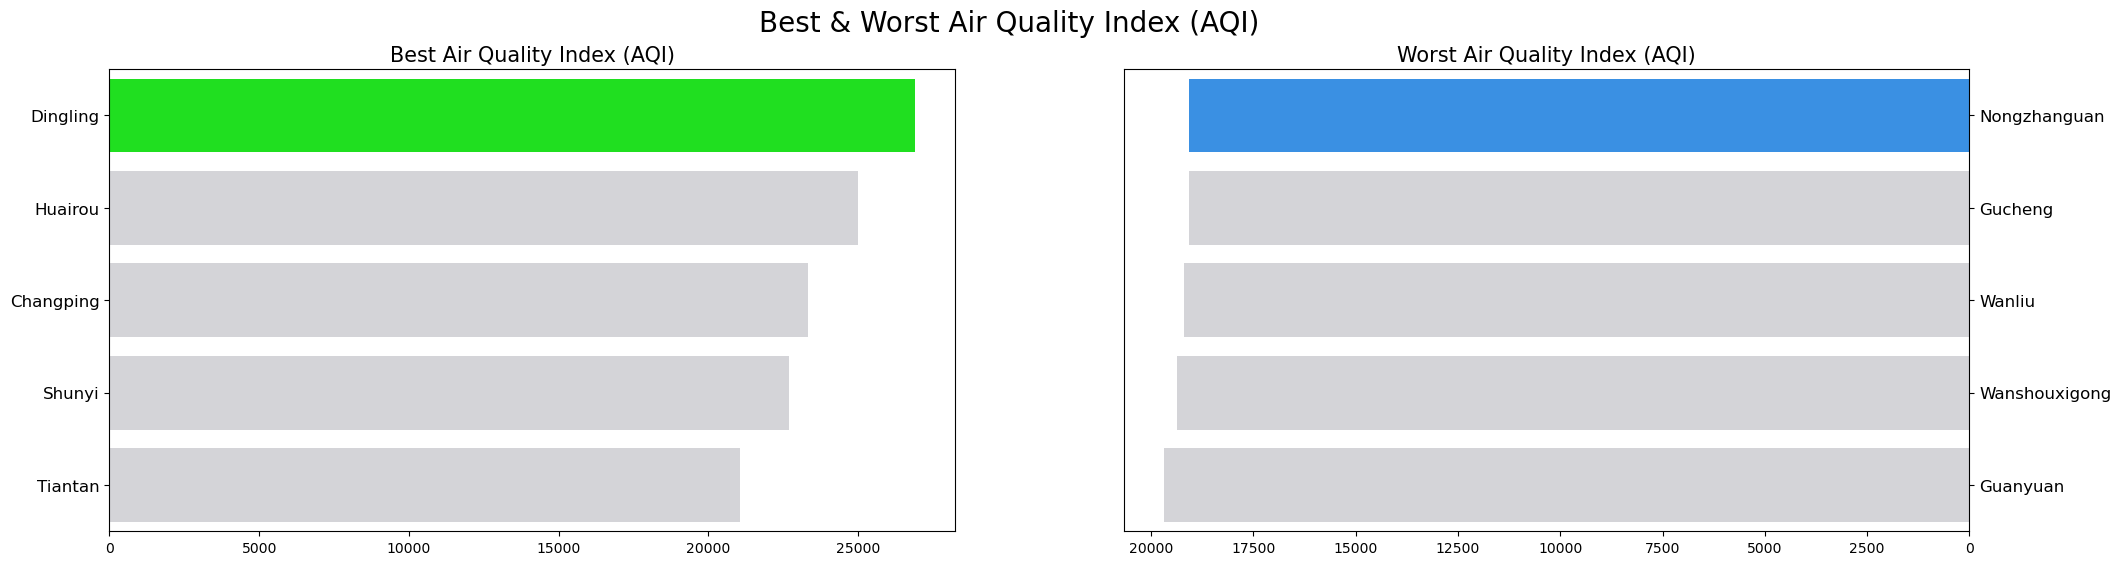

In [243]:
# Create subplot grid
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

# Define color templates for visualization
colors1 = ["#00FF00", "#D3D3D9", "#D3D3D9", "#D3D3D9", "#D3D3D9"]
colors2 = ["#1E90FF", "#D3D3D9", "#D3D3D9", "#D3D3D9", "#D3D3D9"]

# Create bar plot for the Best Air Quality Index (AQI)
sns.barplot(x="index_AQI", y="column_station", data=area_df.head(5), palette=colors1, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Air Quality Index (AQI)", loc="center", fontsize=15)
ax[0].tick_params(axis='y', labelsize=12)

# Create bar plot for the Worst Air Quality Index (AQI)
sns.barplot(x="index_AQI", y="column_station", data=area_df.sort_values(by="index_AQI", ascending=True).head(5), palette=colors2, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None) # Firman Nurcahyo_DICODING_IDCAMP
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Air Quality Index (AQI)", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

# Set main title
plt.suptitle("Best & Worst Air Quality Index (AQI)", fontsize=20)
plt.show()

Dari visualisasi di atas, dapat disimpulkan bahwa Dingling menempati posisi teratas sebagai daerah dengan kualitas udara terbaik, sedangkan Nongzhanguan berada pada posisi terendah dalam hal kualitas udara. Visualisasi ini memberikan gambaran jelas mengenai peringkat daerah berdasarkan Indeks Kualitas Udara (AQI), dengan Dingling menonjol sebagai yang memiliki performa terbaik sementara Nongzhanguan menunjukkan performa paling rendah dalam hal kualitas udara.

### **2. Apa pengaruh dari variabel TEMP, WSPM, PRES, dan DEWP terhadap kualitas udara?**

In [244]:
# Convert the 'PRES' column from hPa to inHg
df_AQI["column_PRES"] = df_AQI["column_PRES"].apply(lambda pressure_hpa: pressure_hpa * 0.02953)

In [245]:
# Create a new DataFrame containing mean values based on air quality
df_mean = df_AQI.groupby(by="air_quality").agg({
    "column_TEMP": ['mean'],
    "column_PRES": ['mean'], # Firman Nurcahyo_DICODING_IDCAMP
    "column_DEWP": ['mean'],
    "column_WSPM": ['mean']
})

# Display the contents of the new DataFrame
df_mean

,column_TEMP,column_PRES,column_DEWP,column_WSPM
,mean,mean,mean,mean
air_quality,,,,
Bad,6.327116,29.955380,-1.977529,1.264944
Good,14.714386,29.833908,2.141883,1.955059
Moderate,11.893327,29.864384,3.351435,1.368228


In [246]:
# Transpose the DataFrame for easier visualization
df_mean = df_mean.T
# Display the content of the transposed DataFrame
df_mean

,air_quality,Bad,Good,Moderate
column_TEMP,mean,6.327116,14.714386,11.893327
column_PRES,mean,29.955380,29.833908,29.864384
column_DEWP,mean,-1.977529,2.141883,3.351435
column_WSPM,mean,1.264944,1.955059,1.368228


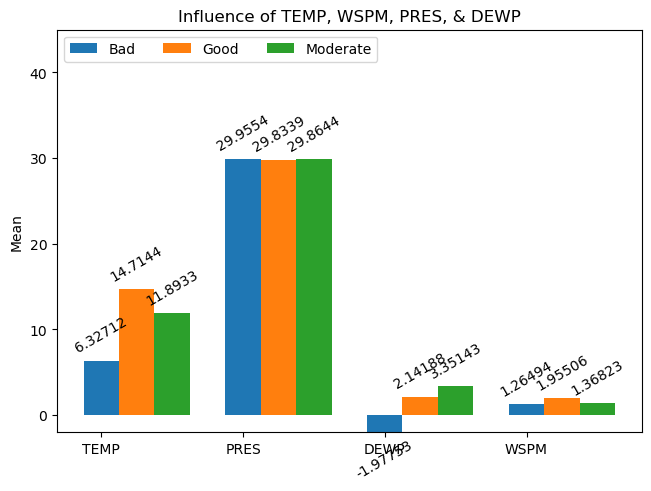

In [247]:
# Define a tuple for attribute labels in visualization
species = ("TEMP", "PRES", "DEWP", "WSPM")

# Set the position, width, and gap for each bar
x = np.arange(len(species))
width = 0.25
multiplier = 1

# Create a subplot grid
fig, ax = plt.subplots(constrained_layout=True)

# Loop to fill the subplot grid with plots
for attribute, measurement in df_mean.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=4, rotation=30) # Firman Nurcahyo_DICODING_IDCAMP
    multiplier += 1

# Add text, title, and labels
ax.set_ylabel('Mean')
ax.set_title('Influence of TEMP, WSPM, PRES, & DEWP')
ax.set_xticks(x + width)
ax.set_xticklabels(species)
ax.legend(loc='upper left', ncols=4)
ax.set_ylim(-2, 45)

plt.show()

Dari visualisasi di atas, dapat disimpulkan bahwa terdapat tren perubahan pada variabel-variabel tertentu seiring dengan peningkatan kualitas udara. Secara khusus, ketika kualitas udara membaik, terlihat bahwa suhu (TEMP) mengalami peningkatan, tekanan udara (PRES) cenderung menurun, kelembaban (DEWP) mengalami peningkatan, dan kecepatan angin (WSPM) juga mengalami peningkatan. Ini menunjukkan adanya korelasi antara kualitas udara yang lebih baik dengan kondisi meteorologi tertentu, seperti peningkatan suhu dan kecepatan angin, serta penurunan tekanan udara dan peningkatan kelembaban.

### **3. Bagaimana kualitas udara bervariasi berdasarkan tahun, bulan, hari, dan jam?**

In [248]:
# Create a list for categorical variable labels in visualization
cat_var = ["column_year", "column_month", "column_day", "column_hour"]


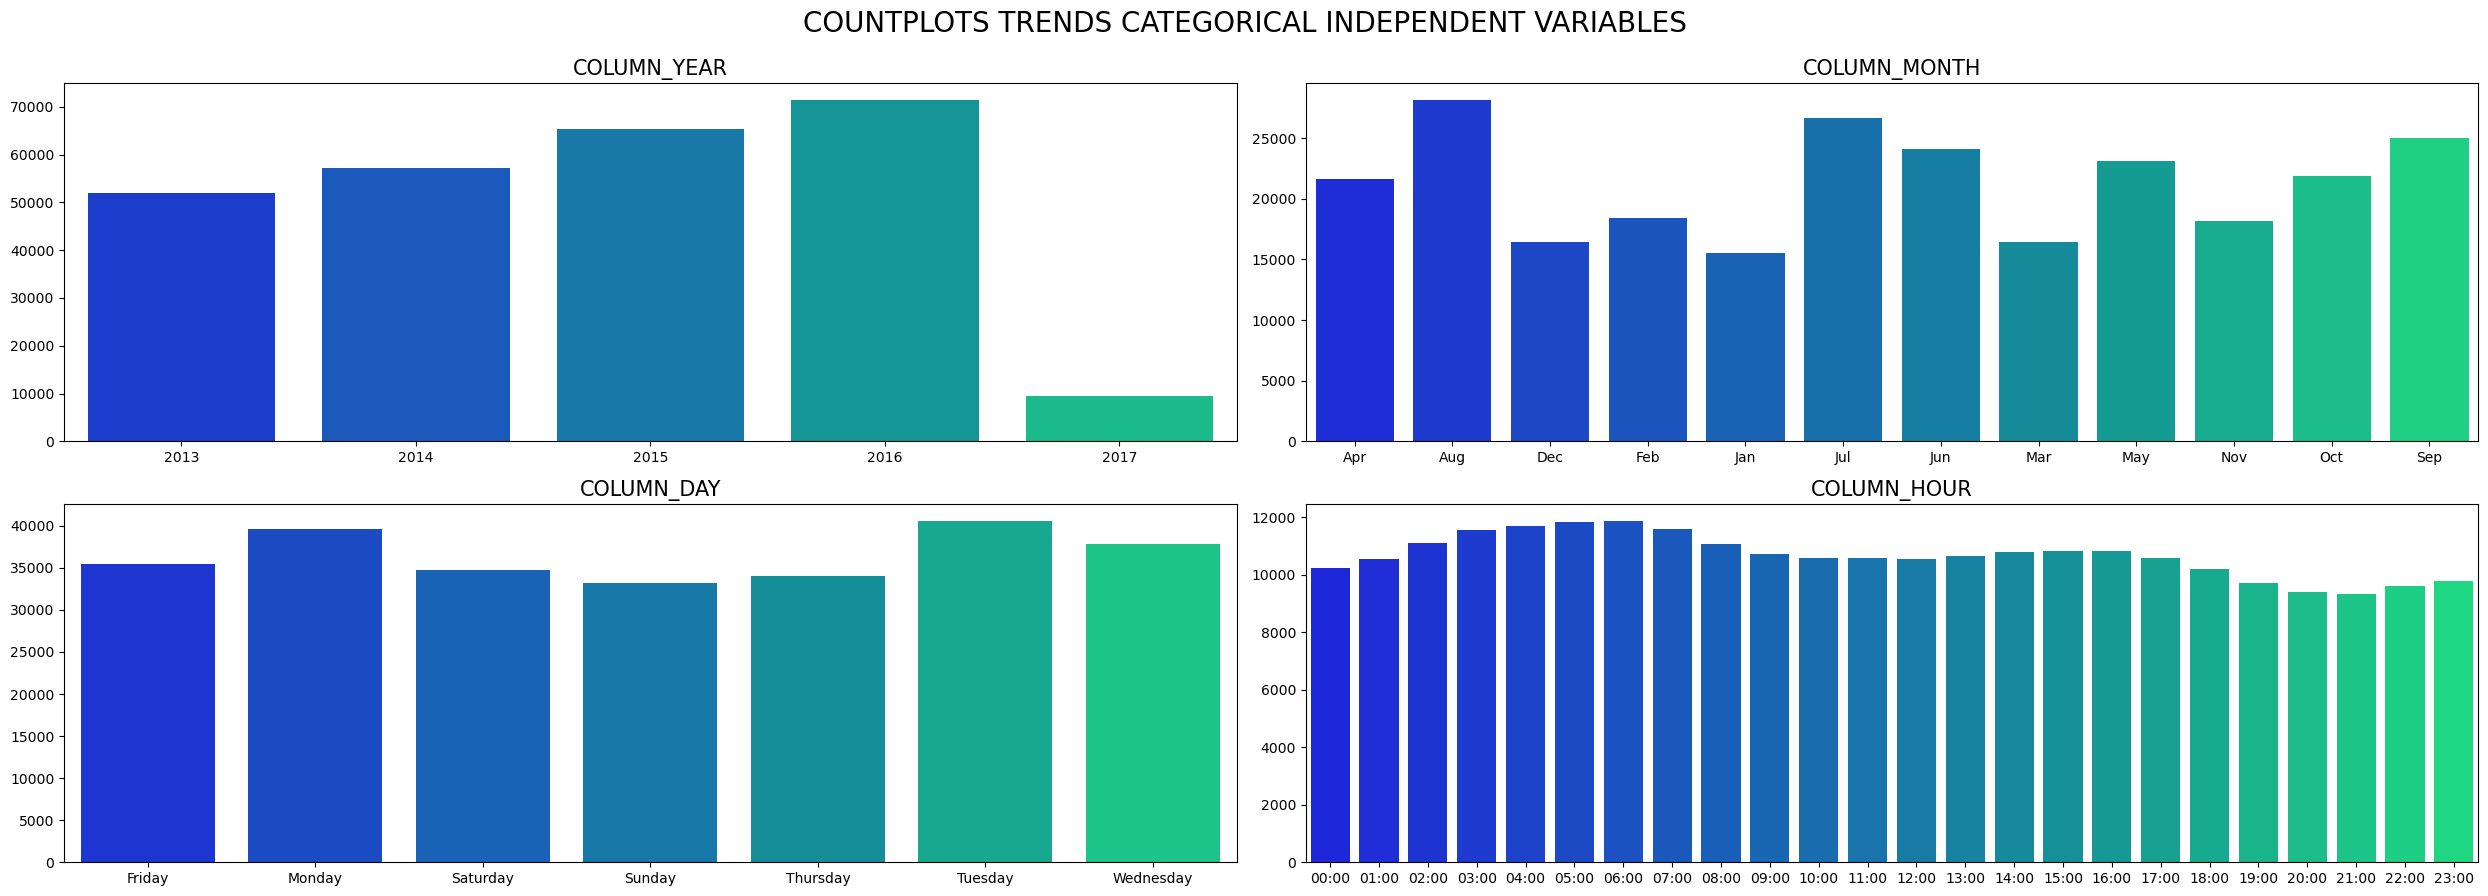

In [249]:
# Create subplot grid
fig, ax = plt.subplots(nrows=2, ncols=int(len(cat_var)/2), figsize=(25, 9))

# Set main title
plt.suptitle('Countplots trends categorical independent variables'.upper(), fontsize=20, fontweight=20, y=0.99)

# Loop to fill the subplot grid with plots
k = 0
for i in range(2):
    for j in range(int(len(cat_var)/2)):
        sns.barplot(
            y=df_AQI.groupby(by=cat_var[k]).index_AQI.sum(),
            x=df_AQI.groupby(by=cat_var[k]).mean(numeric_only=True).index,
            ax=ax[i, j],
            palette='winter' # Firman Nurcahyo_DICODING_IDCAMP
        )

        ax[i, j].set_title(f'{cat_var[k].upper()}', fontsize=15)
        ax[i, j].set_ylabel('')
        ax[i, j].set_xlabel('')
        k += 1

plt.tight_layout()
plt.show()


Dari visualisasi di atas, dapat ditarik beberapa informasi sebagai berikut :

**Tahun :** Tahun 2016 menunjukkan kualitas udara terbaik, sedangkan tahun 2017 memiliki kualitas udara terendah. Namun, perlu diperhatikan bahwa pengamatan pada tahun 2017 hanya dilakukan selama dua bulan, sehingga kualitas udara terendah secara keseluruhan dapat ditemukan pada tahun 2013.

**Bulan :** Bulan Agustus memiliki kualitas udara terbaik, sementara bulan Januari memiliki kualitas udara terendah.

**Hari :** Kualitas udara terbaik terjadi pada hari Kamis, sedangkan hari Minggu memiliki kualitas udara terendah.

**Waktu Jam :** Jam 06:00 menunjukkan kualitas udara terbaik, sementara jam 21:00 memiliki kualitas udara terendah.

### **4. Penggunaan heatmap untuk mengamati hubungan antara variabel**

In [250]:
# Drop columns "No" and "year" from the DataFrame
df_heatmap = df_AQI.drop(columns=["column_index", "column_year"])

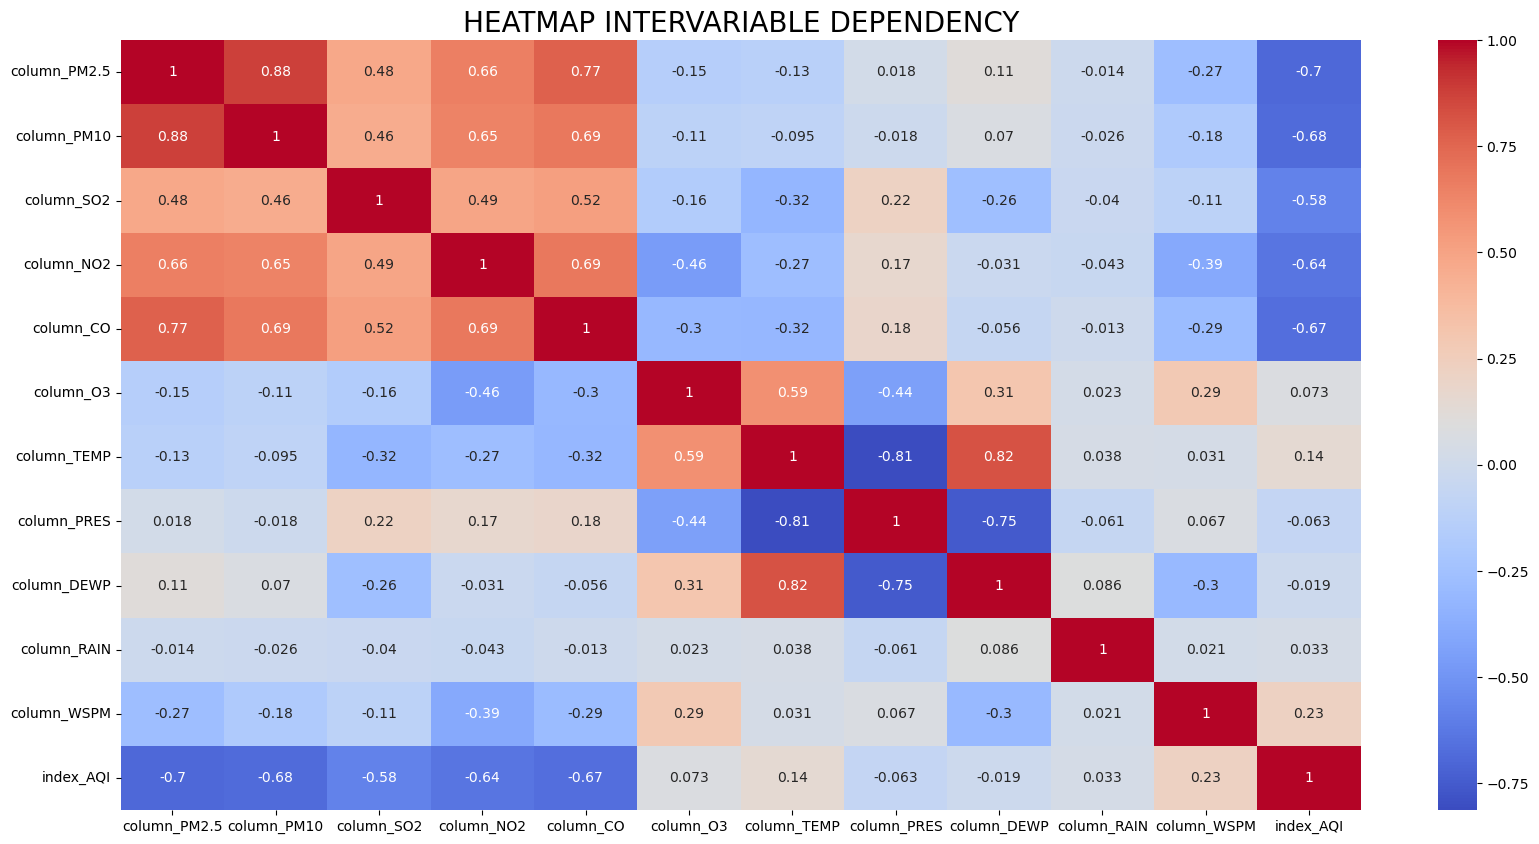

In [251]:
# Set plot size
plt.figure(figsize=(20, 10))

# Plotting heatmap
sns.heatmap(df_heatmap.corr(numeric_only=True), annot=True, cmap='coolwarm')

# Set title
plt.title('Heatmap intervariable dependency'.upper(), fontsize=20, y=1)
# Firman Nurcahyo_DICODING_IDCAMP
plt.show()

**Kesimpulan Pertanyaan 1 :** Daerah yang menunjukkan kualitas udara optimal adalah Dingling, diikuti oleh Huairou dan Changping, sementara daerah dengan kualitas udara rendah adalah Nongzhangua, diikuti oleh Gucheng dan Wanliu.

**Kesimpulan Pertanyaan 2 :** Korelasi menunjukkan bahwa semakin tinggi suhu (TEMP), kecepatan angin (WSPM), dan kelembaban (DEWP), semakin baik kualitas udara. Namun, semakin tinggi tekanan udara (PRES), kualitas udara cenderung menurun.

**Kesimpulan Pertanyaan 3 :** Berdasarkan tahun, kualitas udara mencapai puncaknya pada tahun 2016 dan mencapai rendahnya pada tahun 2013. Dalam aspek bulanan, Agustus menonjol sebagai bulan dengan kualitas udara terbaik, sementara Januari memiliki kualitas udara terendah. Dilihat dari hari, kualitas udara optimal cenderung terjadi pada hari Kamis, sementara hari Minggu menunjukkan kualitas udara rendah. Dalam konteks waktu harian, kualitas udara puncak terjadi pada jam 06:00, sementara jam 21:00 menandakan penurunan kualitas udara.

In [253]:
# Export the cleaned dataset to a CSV file
df_AQI.to_csv("df_AQI.csv", index=False)